# Visualizing Black Friday sales
In this assignment, five different visualizations will be shown. The visualization regard the Black friday sales of a retail company

## Importing the necessary libraries

In [11]:
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from heapq import nlargest

## Functions
In this section, a few functions will be created in order to reuse them multiple times.

In [12]:
# Get the unique values of a column in a dataset and store them sorted in a numpy array
# Also drop any NaN values
def get_unique_values(data, column):
    data = data.dropna()
    data_list = sorted(np.array(data[column].unique()))
    return data_list

# Get the length of a column with dropped NaN values
def get_length_column(dataset, column):
    data = dataset.loc[:, column]
    data = data.dropna()
    return len(data)

# Add text to the center of the bar of a plot
def add_text(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] / 2, y[i], ha = "center")

# Plot a pie chart        
def plot_pie_chart(values, labels, title_legend, title_pie):
    plt.pie(values, labels = labels, startangle = 90, autopct='%1.1f%%', shadow = True)
    plt.legend(labels, loc = 3, title = title_legend)
    plt.axis('equal')
    plt.title(title_pie)
    plt.show()

# Get the frequency dictionary of each unique value of a column of a dataset    
def freq_table_single(dataset, column):
    output = {}
    unique_values = get_unique_values(dataset, column)
    for value in unique_values:
        data = dataset.loc[dataset[column] == value, column]
        output[value] = len(data)
    return output

## Import the file
Now we're going to import the csv file and take some information about it in order to decide which visualizations I want to show. For this exercise, we will use the test csv file from the Black Friday dataset.

In [13]:
# Importing and reading the file
file = 'black-friday-sales-test.csv'
sales = pd.read_csv(file)
# Display info 
print(sales.info(), sales.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB
None    User_ID Product_ID Gender    Age  Occupation City_Category  \
0 

## Information results
As you can see, the csv file has the following columns:
- `User_ID`
- `Product_ID`
- `Gender`
- `Age`
- `Occupation`
- `City_Category`
- `Stay_In_Current_City_Years`
- `Marital_Status`
- `Product_Category_1`
- `Product_Category_2`
- `Product_Category_3`

## Selection for visualizaitons
Based on the columns and possible combinations, I've created five different visualizations. The reasons for choosing will be explained in each visualization seperately, along with the findings of the graphs.
Ultimately, I've chosen the following visualizations:
- `Age and Gender distribution`
- `Stay in city years`
- `Product category sales` 
- `Martial status vs Product category`
- `Martial status vs City category`

## Age and Gender distribution
In this visualization, an distribution of the age will be shown for males and females separately. I've chosen this visualization in order to create an overview of which group has made the most purchases. This can help the marketing team for profiling the customers.

### Plot Age and Gender distribution

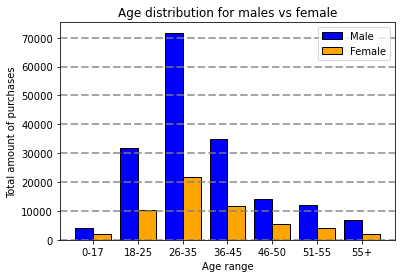

In [14]:
## Use the group by function
age_list = get_unique_values(sales, 'Age')

# Get male and female data to make freq tables
male_data = sales.loc[sales['Gender'] == 'M']
female_data = sales.loc[sales['Gender'] == 'F']

male_freq = freq_table_single(male_data, 'Age')
female_freq = freq_table_single(female_data, 'Age')    
    
# Create a bar chart
width = 0.4
index = np.arange(len(age_list))
values_male = list(male_freq.values())
values_female = list(female_freq.values())
title = "Age distribution for males and females"
xlabel = "Age range"
ylabel = "Total amount of purchases"
label = ["Male", "Female"]
colours = ["blue", "orange"]
title = "Age distribution for males vs female"

plt.bar(index, values_male, color = colours[0], label = label[0], width = width, edgecolor = "black")
plt.bar(index + width, values_female, color = colours[1], label = label[1], width = width, edgecolor = "black")
plt.grid(color='grey', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.legend()
plt.xticks(index + width / 2, (age_list))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)

plt.show()

### Findings Age and Gender distribution
Based on the graph above, we can see that by far the most purchases are from males between the age of 26-35. In general, men tend to buy more than females based on the data. Also, the most purchases in general, based on age, are from people between 18 and 45. This can be explained by the fact that adolescents spend more time on the internet than senior citizens and have more money then children. 

## Stay in city years
In this chapter, a bar plot will be shown of the Stay in city years catagories. This visualization was chosen, because it gives an oppurtunity to show when it's the best time for a new resident to send ads on black friday.

### Plot stay in city years

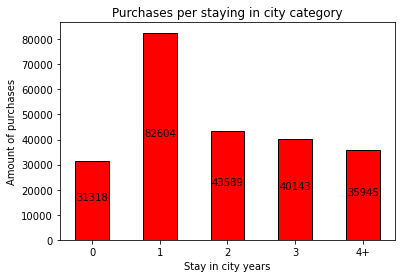

In [15]:
# Create frequency tables for the 'Stay_In_Current_City_Years' column
column = 'Stay_In_Current_City_Years'
stay_in_city_freq = freq_table_single(sales, column)
stay_in_city_cats = get_unique_values(sales, 'Stay_In_Current_City_Years')

## Plot the bar chart based on the frequency table created earlier
plt.bar(list(stay_in_city_freq.keys()), list(stay_in_city_freq.values()), 
        width = 0.5, color = 'red', edgecolor = "black")
add_text(stay_in_city_cats, list(stay_in_city_freq.values()))
plt.xlabel("Stay in city years")
plt.ylabel("Amount of purchases")
plt.title("Purchases per staying in city category")
plt.show()

### Findings bar plot stay in city years
Based on the bar plot, we can see that the most purchases are done by people who stayed in the city for atleast 1 year. That means that after a new person has moved to the city, the best timing is to send him/her black friday ads after about six months in order to build up some hype for the next Black Friday. This will lead to more sales.

## Product category sales
In this chapter, a pie chart will be created for each product catagory. The data three different columns of Product Catagories:
- `Product_Category_1`: Clothes
- `Product_Category_2`: Electronics
- `Product_Category_3`: Home Goods

These visualizations are chosen because it gives a nice overview of which Product categories got the most sales. This can come in handy to decide which product types get more discount during the next Black Friday.

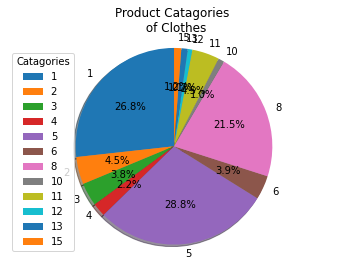

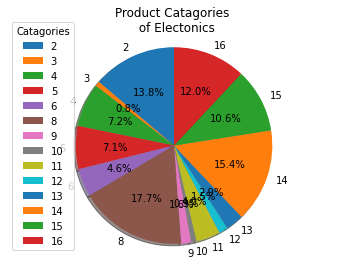

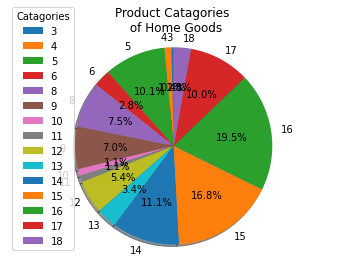

In [16]:
product_categories = ['Clothes', 'Electronics', 'Home Goods']

#product_1 = sales.loc[:, 'Product_Category_1']
product_1 = freq_table_single(sales, 'Product_Category_1')
product_2 = freq_table_single(sales, 'Product_Category_2')
product_3 = freq_table_single(sales, 'Product_Category_3')

# Plot a pie chart
labels = list(product_1.keys())
values = list(product_1.values())
title_legend = "Catagories"
title_pie = "Product Catagories \n of Clothes"

plot_pie_chart(values, labels, title_legend, title_pie)

# Plot a pie chart
labels = [int(x) for x in list(product_2.keys())]
values = list(product_2.values())
title_legend = "Catagories"
title_pie = "Product Catagories \n of Electonics"

plot_pie_chart(values, labels, title_legend, title_pie)

# Plot a pie chart
labels = [int(x) for x in list(product_3.keys())]
values = list(product_3.values())
title_legend = "Catagories"
title_pie = "Product Catagories \n of Home Goods"

plot_pie_chart(values, labels, title_legend, title_pie)

### Findings Product Catagories pie charts
Based on the pie charts we can see that the following product catagories got the most sales:
- `Clothes`: the catagories 1(26.8%), 5(28.8%), 8(21.5)
- `Electronics`: the catagories 8(17.7%), 14(15.4%), 2(13.8%), 16(12.0%), 15(10.6%)
- `Home Goods`: the catagories 16(19.5%), 15(16.8%), 14(11.1%) and 5 (10.1%)

## Martial status vs Product category
In this graph, a bar plot of the martial status compared to the product catagories will be shown. This visualization has been chosen in order to see if a married person in tended to buy different products than a non-married person.

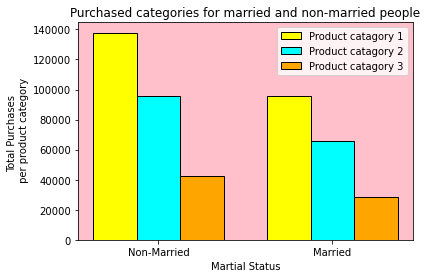

In [17]:
# Percentage bar
martial_status_list = get_unique_values(sales, 'Marital_Status')

product_1_com = {}
product_2_com = {}
product_3_com = {}

product_categories = ['Product_Category_1', 'Product_Category_2', 'Product_Category_3']

for status in martial_status_list:
    data = sales.loc[sales['Marital_Status'] == status]
    product_1_com[status] = get_length_column(data, product_categories[0])
    product_2_com[status] = get_length_column(data, product_categories[1])
    product_3_com[status] = get_length_column(data, product_categories[2])

# Create a bar chart
product_1_values = list(product_1_com.values())
product_2_values = list(product_2_com.values())
product_3_values = list(product_3_com.values())

width = 0.25
color = ['yellow', 'aqua', 'orange']
index = np.arange(len(martial_status_list))
xlabel = "Age range"
ylabel = "Total amount of purchases"
label = ["Non-Married", "Married"]

ax = plt.axes()
ax.set_facecolor("pink")
plt.bar(index, product_1_values, color = 'yellow', label = "Product catagory 1", 
        width = width, edgecolor = 'black')
plt.bar(index + width, product_2_values, color = "aqua", label = "Product catagory 2", 
        width = width, edgecolor = 'black')
plt.bar(index + width * 2, product_3_values, color = "orange", label = "Product catagory 3", 
        width = width, edgecolor = 'black')


plt.legend()
plt.xticks(index + width, (label))
plt.xlabel("Martial Status")
plt.ylabel("Total Purchases \n per product category")
plt.title("Purchased categories for married and non-married people")
plt.show()

### Findings plot martials status vs product catagory
Based on the graph, we can see that there's no significant difference in consumer behaviour between a married person and a non-married person.

## Martial status vs City category
In this graph, the martial status will be shown along with the city category of the person. This visualization is chosen in order to see if a married person tends to live somewhere else than a non-married person. This can come in handy when sending an ad through a specific neighbourhood with discount for specific presents for someone's partner.

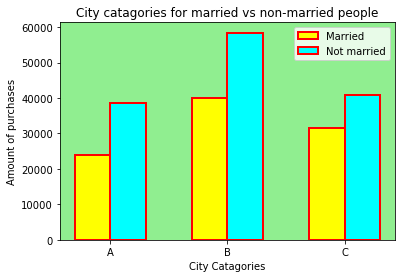

In [18]:
# Get all the unique values for indexing in the bar chart
city_category_list = get_unique_values(sales, "City_Category")

# Split the data into married vs non-married people and creat freq tables
married_data = sales.loc[sales["Marital_Status"] == 1]
non_married_data = sales.loc[sales["Marital_Status"] == 0]

married_freq = freq_table_single(married_data, "City_Category")
non_married_freq = freq_table_single(non_married_data, "City_Category")

# Create the bar chart
index = np.arange(len(city_category_list))
color = ['yellow', 'cyan']
width = 0.3

married_values = list(married_freq.values())
non_married_values = list(non_married_freq.values())

ax = plt.axes()
ax.set_facecolor("lightgreen")
plt.bar(index, married_values, color = color[0], label = "Married", 
        width = width, edgecolor = 'red', linewidth = 2)
plt.bar(index + width, non_married_values, color = color[1], label = "Not married", 
        width = width, edgecolor = 'red', linewidth = 2)
plt.legend()
plt.xticks(index + width / 2, (city_category_list))
plt.xlabel("City Catagories")
plt.ylabel("Amount of purchases")
plt.title("City catagories for married vs non-married people")
plt.show()

### Findings martial status vs city catagory
Based on the graph, we can see the following results.
- `Married people`: City catagory B is the most lived city catagory for married people. Second place comes catagory C and the last place is for catagory A.
- `Non-married people`: Just like for married people, city catagory B is the highest one. However, A and C are really close to each for non-married people in comparison to married people